In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:

file_path_con_fac = 'conversion_factors.xlsx'
file_path_con_fac_hourly = 'electricity_conversion_hourly.xlsx'

df_yr = pd.read_excel(file_path_con_fac, sheet_name='Tabelle1')
df_yr = df_yr.set_index('Energy_Carrier')

#print(df_yr.head())
primary_energy_factors = df_yr['f_PE [kWh/kWh]']
#print(primary_energy_factors)
CO2_factors = df_yr['fCO2eq [g/kWh]']

In [20]:

import nextcloud
file_path_sim_results = "EE/1_Forschung/2_Laufend/2023 MA25 Alliiertenviertel/FHTW Ergebnisse/hulls_anual_specific_demands.xlsx"
file = nextcloud.get(file_path_sim_results)
df=pd.read_excel(file)
df.head()


trying to get file_path='EE/1_Forschung/2_Laufend/2023 MA25 Alliiertenviertel/FHTW Ergebnisse/hulls_anual_specific_demands.xlsx' from LOCAL_NEXTCLOUD=['C:\\Users\\Simon Schneider\\Nextcloud', 'C:\\Users\\lektor\\nextcloud']...


,Name,east_walls,east_windows,north_walls,north_windows,south_walls,south_windows,top_roofs,west_walls,west_windows,...,Qcs_sen_sys0_W_Af_m2,Qcs_lat_sys0_W_Af_m2,Qcs_em_ls0_W_Af_m2,Qcs_dis_ls0_W_Af_m2,Qhpro_sys0_W_Af_m2,Qcpro_sys0_W_Af_m2,QH_sys0_W_Af_m2,QC_sys0_W_Af_m2,scenario,compact_category
0,B1000,224.948456,39.696786,489.687317,86.415409,190.278538,33.578566,360.824596,483.640692,85.348357,...,0,0.0,0,0,0,0,64.011012,0.0,original_1919bis1944,High
1,B1001,204.143604,36.025342,567.251254,100.103162,439.210727,77.507775,505.328554,616.901072,108.864895,...,0,0.0,0,0,0,0,74.141564,0.0,original_1919bis1944,High
2,B1002,88.470043,15.612361,332.028944,58.593343,331.796717,58.552362,220.667653,83.317162,14.703029,...,0,0.0,0,0,0,0,86.001466,0.0,original_1919bis1944,Medium
3,B1003,180.074329,31.777823,141.351647,24.944408,495.303288,87.406463,300.271763,454.592687,80.222239,...,0,0.0,0,0,0,0,79.336538,0.0,original_1919bis1944,Medium
4,B1004,355.026329,62.651705,692.687410,122.238955,475.182802,83.855789,459.490063,230.310600,40.643047,...,0,0.0,0,0,0,0,72.188348,0.0,original_1919bis1944,High


In [21]:
# Define the relevant columns for final energy demand
final_energy_columns = [
    'GRID_kWhyr_Af_m2', 'DH_ww_kWhyr_Af_m2', 'DH_hs_kWhyr_Af_m2', 
    'NG_hs_kWhyr_Af_m2', 'COAL_hs_kWhyr_Af_m2', 'OIL_hs_kWhyr_Af_m2', 
    'WOOD_hs_kWhyr_Af_m2', 'SOLAR_hs_kWhyr_Af_m2', 'NG_ww_kWhyr_Af_m2', 
    'COAL_ww_kWhyr_Af_m2', 'OIL_ww_kWhyr_Af_m2', 'WOOD_ww_kWhyr_Af_m2', 
    'SOLAR_ww_kWhyr_Af_m2'
]

# Calculate total final energy demand by summing the relevant columns
df['total_final_energy_demand_kWhyr_Af_m2'] = df[final_energy_columns].sum(axis=1)
df['total_final_energy_demand_kWhyr_Af_m2']

0       240.755213
1       276.829333
2       321.773345
3       295.541601
4       275.467444
           ...    
2275    111.781689
2276      8.982243
2277    112.301714
2278     95.469309
2279    105.859141
Name: total_final_energy_demand_kWhyr_Af_m2, Length: 2280, dtype: float64

In [22]:
# Define energy carriers grouped by types
coal_columns = ['COAL_hs_kWhyr_Af_m2', 'COAL_ww_kWhyr_Af_m2']
oil_columns = ['OIL_hs_kWhyr_Af_m2', 'OIL_ww_kWhyr_Af_m2']
wood_columns = ['WOOD_hs_kWhyr_Af_m2', 'WOOD_ww_kWhyr_Af_m2']  # Biomass
natural_gas_columns = ['NG_hs_kWhyr_Af_m2', 'NG_ww_kWhyr_Af_m2']
district_heating_columns = ['DH_ww_kWhyr_Af_m2', 'DH_hs_kWhyr_Af_m2']

# Add primary energy demand calculation using new conversion factors
df['primary_coal_demand'] = df[coal_columns].sum(axis=1) * primary_energy_factors['COAL']
df['primary_oil_demand'] = df[oil_columns].sum(axis=1) * primary_energy_factors['OIL']
df['primary_natural_gas_demand'] = df[natural_gas_columns].sum(axis=1) * primary_energy_factors['NATURAL_GAS']
df['primary_biomass_demand'] = df[wood_columns].sum(axis=1) * primary_energy_factors['BIOMASS']
df['primary_district_heating_demand'] = df[district_heating_columns].sum(axis=1) * primary_energy_factors['DISTRICT_HEATING_VIENNA']

# Calculate total primary energy demand
df['total_primary_energy_demand'] = df[['primary_coal_demand', 'primary_oil_demand', 
                                        'primary_natural_gas_demand', 'primary_biomass_demand', 
                                        'primary_district_heating_demand']].sum(axis=1)

# Add CO2 emissions calculations
df['co2_coal'] = df[coal_columns].sum(axis=1) * CO2_factors['COAL']
df['co2_oil'] = df[oil_columns].sum(axis=1) * CO2_factors['OIL']
df['co2_natural_gas'] = df[natural_gas_columns].sum(axis=1) * CO2_factors['NATURAL_GAS']
df['co2_biomass'] = df[wood_columns].sum(axis=1) * CO2_factors['BIOMASS']
df['co2_district_heating'] = df[district_heating_columns].sum(axis=1) * CO2_factors['DISTRICT_HEATING_VIENNA']

# Calculate total CO2 emissions
df['total_co2_emissions'] = df[['co2_coal', 'co2_oil', 'co2_natural_gas', 
                                'co2_biomass', 'co2_district_heating']].sum(axis=1)

# Display results: Total Primary Energy Demand and CO2 Emissions
df_result = df[['Name', 'total_primary_energy_demand', 'total_co2_emissions']]

In [23]:
df[['Sanierung', 'Baualter']] = df['scenario'].str.split('_', expand=True)
df

,Name,east_walls,east_windows,north_walls,north_windows,south_walls,south_windows,top_roofs,west_walls,west_windows,...,primary_district_heating_demand,total_primary_energy_demand,co2_coal,co2_oil,co2_natural_gas,co2_biomass,co2_district_heating,total_co2_emissions,Sanierung,Baualter
0,B1000,224.948456,39.696786,489.687317,86.415409,190.278538,33.578566,360.824596,483.640692,85.348357,...,0.0,238.183007,0,0,43522.531313,0,0.0,43522.531313,original,1919bis1944
1,B1001,204.143604,36.025342,567.251254,100.103162,439.210727,77.507775,505.328554,616.901072,108.864895,...,0.0,276.880822,0,0,50593.677553,0,0.0,50593.677553,original,1919bis1944
2,B1002,88.470043,15.612361,332.028944,58.593343,331.796717,58.552362,220.667653,83.317162,14.703029,...,0.0,325.890847,0,0,59549.145718,0,0.0,59549.145718,original,1919bis1944
3,B1003,180.074329,31.777823,141.351647,24.944408,495.303288,87.406463,300.271763,454.592687,80.222239,...,0.0,297.823002,0,0,54420.384821,0,0.0,54420.384821,original,1919bis1944
4,B1004,355.026329,62.651705,692.687410,122.238955,475.182802,83.855789,459.490063,230.310600,40.643047,...,0.0,273.617414,0,0,49997.363850,0,0.0,49997.363850,original,1919bis1944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2275,B1072,73.700292,13.005934,340.708067,60.124953,339.831116,59.970197,369.574815,185.615084,32.755603,...,0.0,97.542970,0,0,17823.760923,0,0.0,17823.760923,san,bis1918
2276,B1073,14.579983,2.572938,8.068625,1.423875,8.068631,1.423876,18.091476,14.579983,2.572938,...,0.0,0.000000,0,0,0.000000,0,0.0,0.000000,san,bis1918
2277,B1074,909.287357,160.462475,1876.880532,331.214212,1447.052850,255.362268,2053.985280,203.483949,35.908932,...,0.0,50.639482,0,0,9253.214518,0,0.0,9253.214518,san,bis1918
2278,B1075,784.743194,138.484093,1110.866783,196.035315,0.000000,NaN,864.171277,355.517640,62.738407,...,0.0,72.705708,0,0,13285.315764,0,0.0,13285.315764,san,bis1918


NameError: name 'plt' is not defined

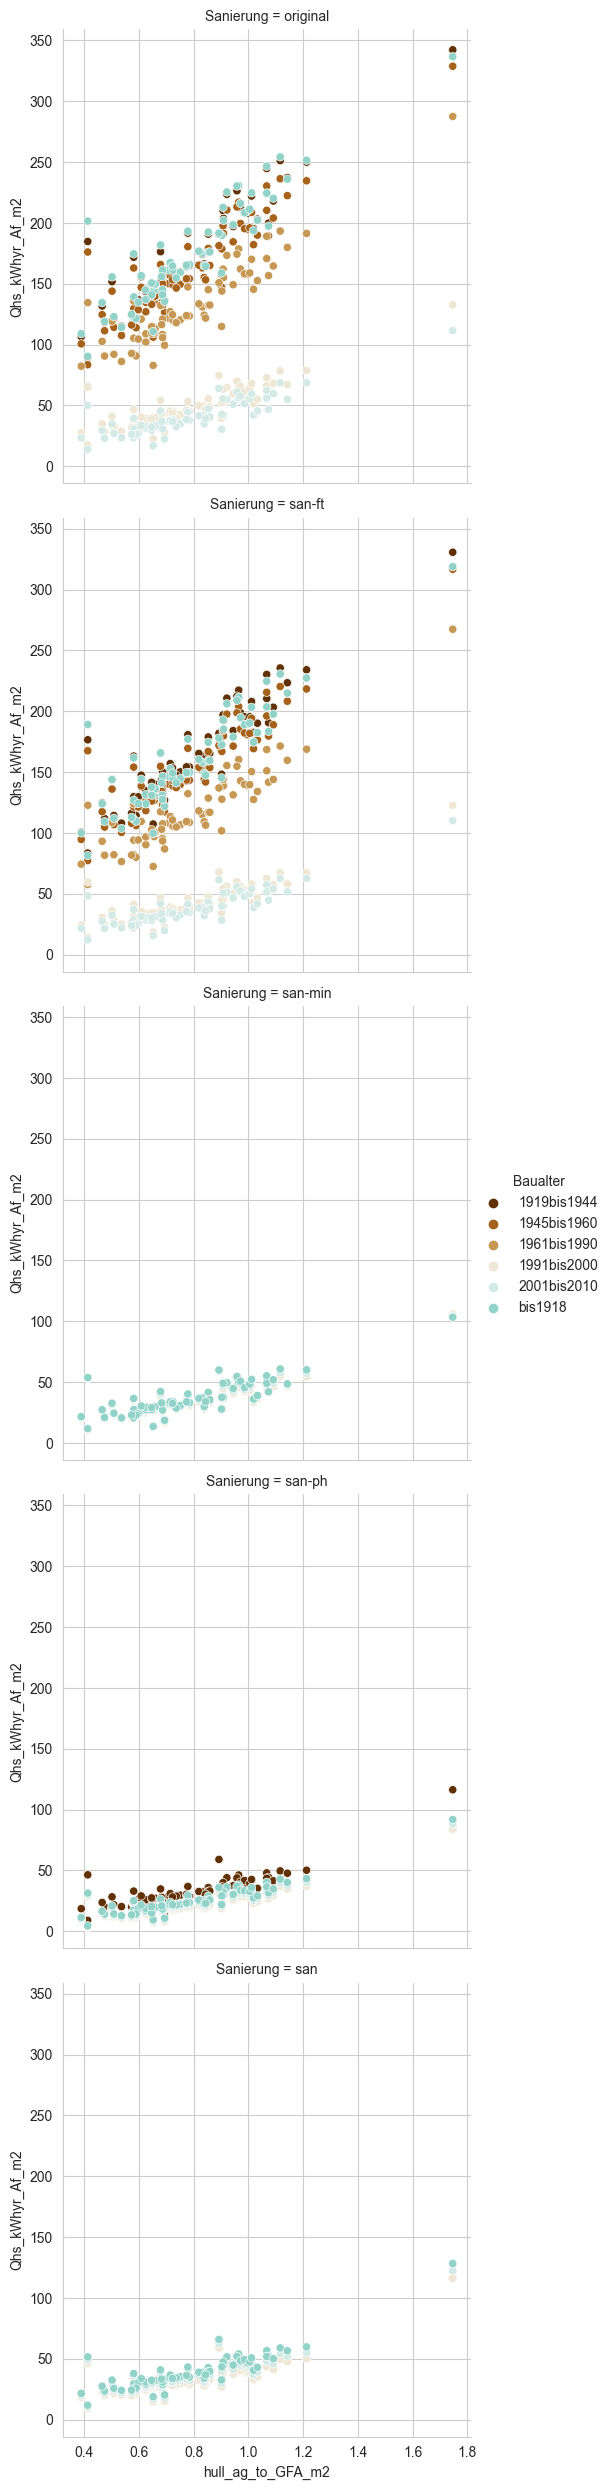

In [24]:
import seaborn as sns
custom_palette = [
    (0.380, 0.188, 0.020),  # Dark brown
    (0.651, 0.380, 0.102),  # Brown
    (0.780, 0.596, 0.325),  # Light brown
    (0.937, 0.902, 0.827),  # Beige
    (0.831, 0.918, 0.902),  # Light teal
    (0.569, 0.827, 0.784)   # Teal
]

# Set seaborn palette
sns.set_palette(custom_palette)
bins = [0, 0.6, 0.8, 1, 1.8]
labels = ['Very High', 'High', 'Medium', 'Low']
compact_col = "hull_ag_to_GFA_m2"
category_col = "compact_category"

y_col = "Qhs_kWhyr_Af_m2"
x_col = compact_col
df_wo_zeros = df[df[y_col]>0]
sns.set_style("whitegrid")
#sns.lmplot(df_wo_zeros, x=x_col , y=y_col, hue="Baualter", ci=0)
sns.relplot(df_wo_zeros, x=x_col, y=y_col, hue = "Baualter", row="Sanierung")
plt.ylim(0,250)
plt.xlim(0.4,1.3)

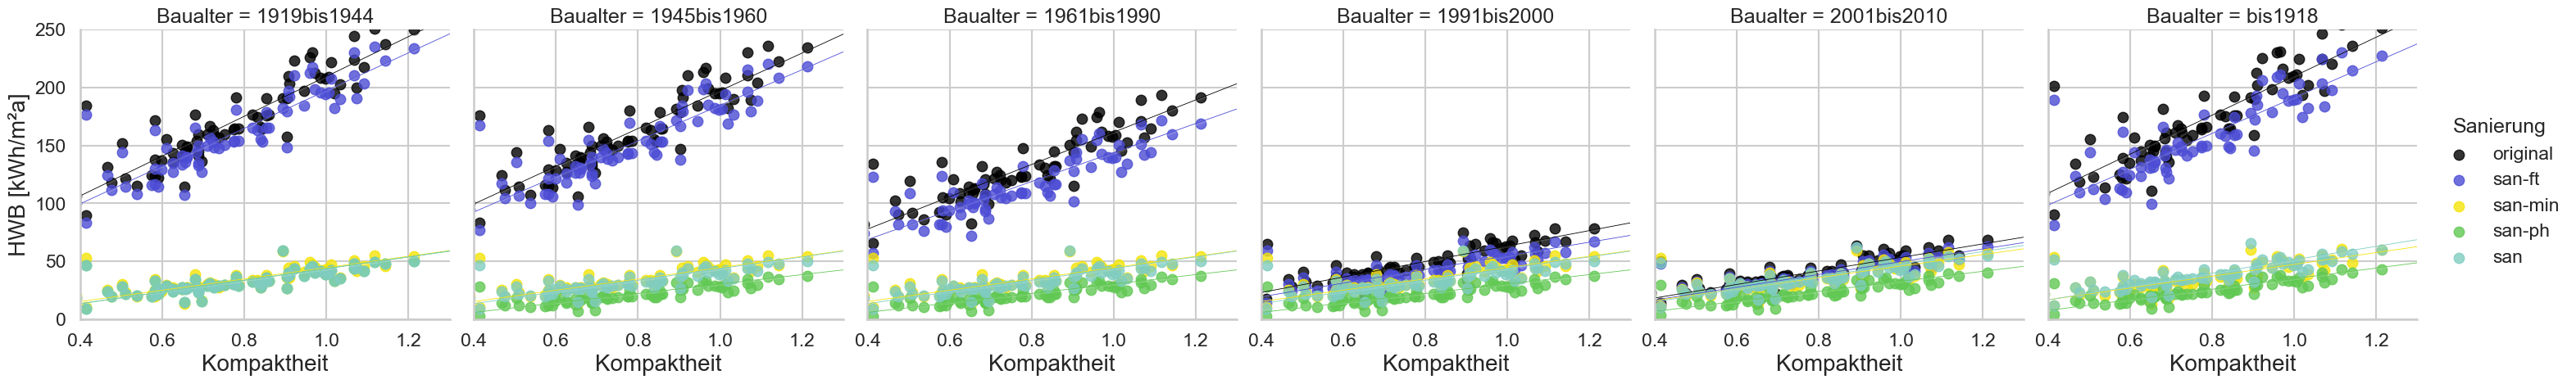

In [ ]:
import seaborn as sns

# Define the custom palette
san_color = [
    (0,0,0),
    (0.3, 0.3, 0.835),   # FT
    (0.957, 0.894, 0.035),   # Yellow
    (0.380, 0.784, 0.325),  # Green
    (0.502, 0.804, 0.757),  # Light teal
]

# Set seaborn palette
sns.set_palette(san_color)
sns.set_context("talk")
g = sns.lmplot(df_wo_zeros, x=x_col, y=y_col, col = "Baualter", hue="Sanierung", ci=0,line_kws={"linewidth": 0.6}) # Adjust fontsize as needed))
plt.ylim(0,250)
plt.xlim(0.4,1.3)
# Set custom axis labels with a larger font size
g.set_axis_labels("Kompaktheit", "HWB [kWh/m²a]", fontsize=20)

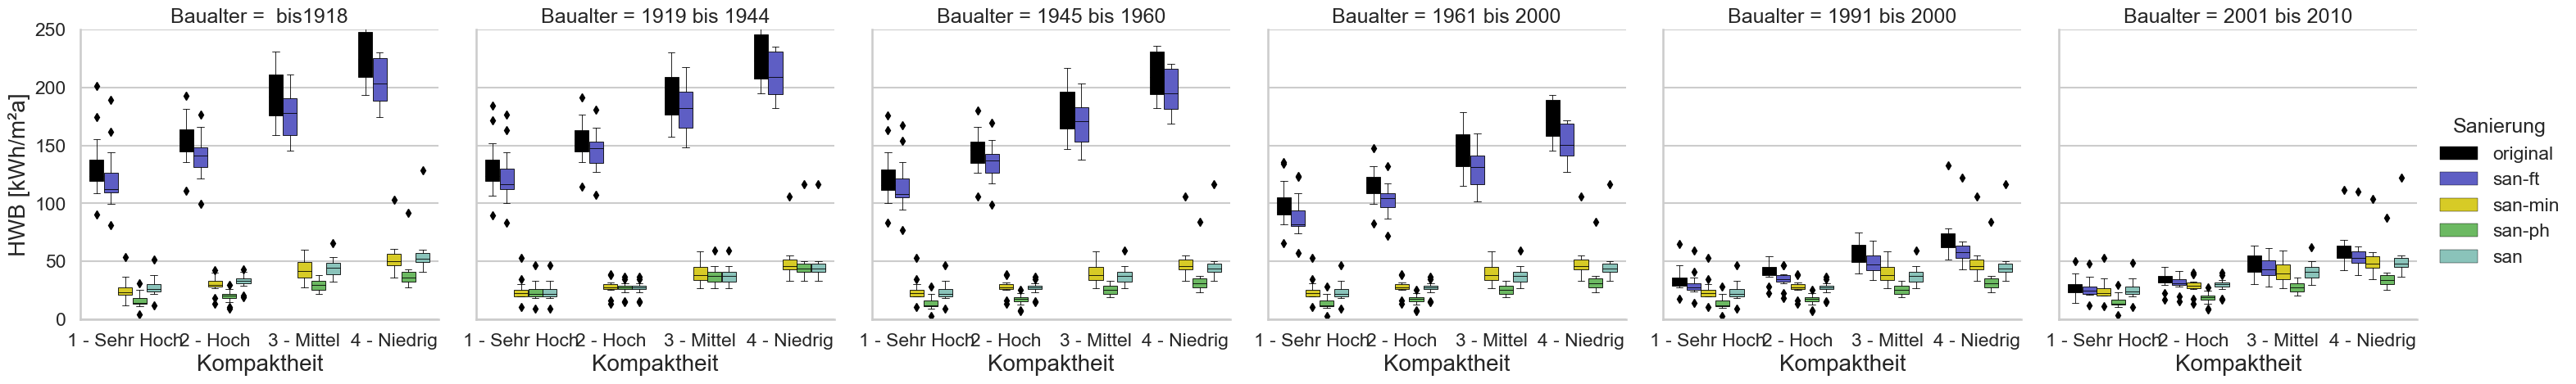

In [ ]:
sns.set_palette(san_color)
sns.set_context("talk")
# Define the mapping dictionary
# Define the mapping dictionary for Kompaktheit
category_mapping = {
    "Very High": "1 - Sehr Hoch",
    "High": "2 - Hoch",
    "Medium": "3 - Mittel",
    "Low": "4 - Niedrig"
}

# Define the mapping dictionary for Baualter
alter_mapping = {
    "bis1918": " bis1918",
    "1919bis1944": "1919 bis 1944", 
    "1945bis1960": "1945 bis 1960", 
    "1961bis1990": "1961 bis 2000", 
    "1991bis2000": "1991 bis 2000", 
    "2001bis2010": "2001 bis 2010", 
}

# Create new columns by mapping the values
df['Kompaktheit'] = df[category_col].map(category_mapping)
df['Baualter'] = df["Baualter"].map(alter_mapping)

# Define the custom order for x-axis labels and Baualter categories
x_order = ["1 - Sehr Hoch", "2 - Hoch", "3 - Mittel", "4 - Niedrig"]
baualter_order = [" bis1918", "1919 bis 1944", "1945 bis 1960", "1961 bis 2000",  "1991 bis 2000", "2001 bis 2010"]

# Filter the DataFrame
df_wo_zeros = df[df[y_col] > 0]
g = sns.catplot(
    data=df_wo_zeros,
    x="Kompaktheit",
    y=y_col,
    col="Baualter",  # Creates separate plots for each 'Baualter'
    hue="Sanierung",  # Use hue for color coding by 'Sanierung'
    kind="box",  # Use boxplot
    order=x_order,
    
    col_order=baualter_order,  # Specify the order of Baualter subplots
    linewidth=0.6,  # Set boxplot line width
    height=5,  # Adjust the size of the plot
    aspect=1  # Control aspect ratio
)

# Set axis limits
plt.ylim(0, 250)

# Set custom axis labels with a larger font size
g.set_axis_labels("Kompaktheit", "HWB [kWh/m²a]", fontsize=20)

# Show the plot
plt.show()

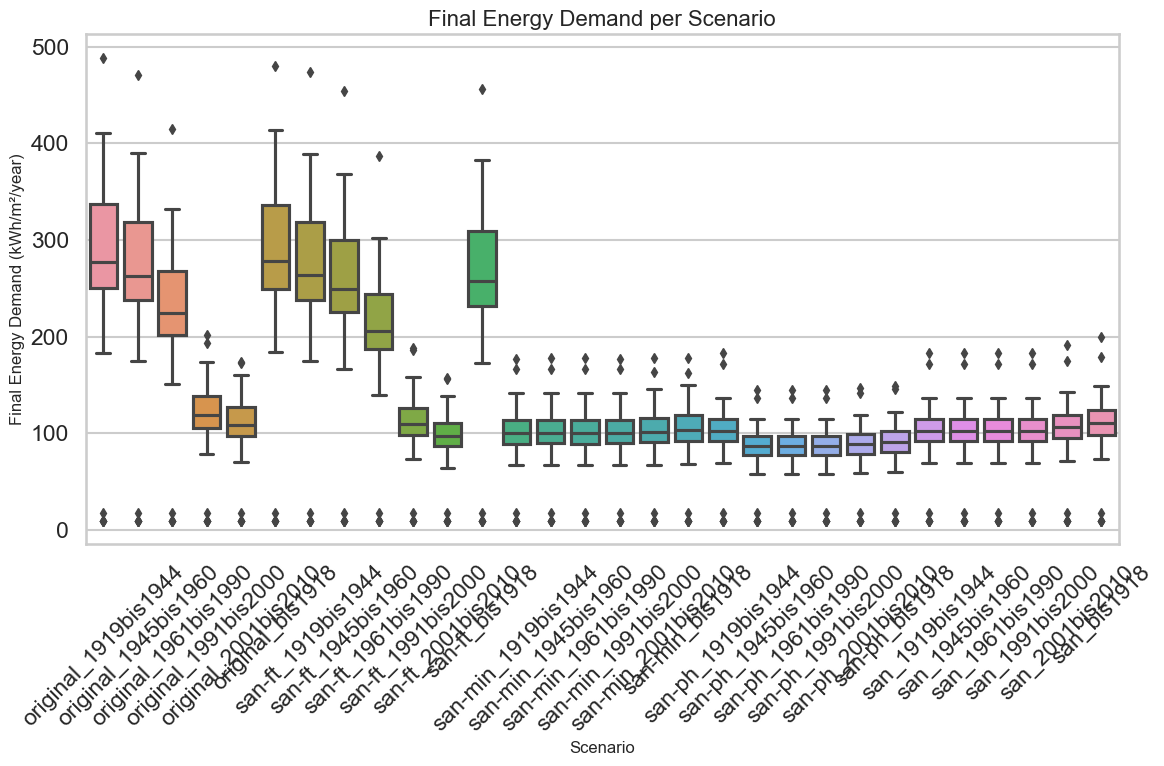

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure size for the plots
plt.figure(figsize=(12, 8))

# Create a boxplot for final energy demand per scenario
sns.boxplot(x='scenario', y='total_final_energy_demand_kWhyr_Af_m2', data=df)

# Set plot title and labels
plt.title('Final Energy Demand per Scenario', fontsize=16)
plt.xlabel('Scenario', fontsize=12)
plt.ylabel('Final Energy Demand (kWh/m²/year)', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

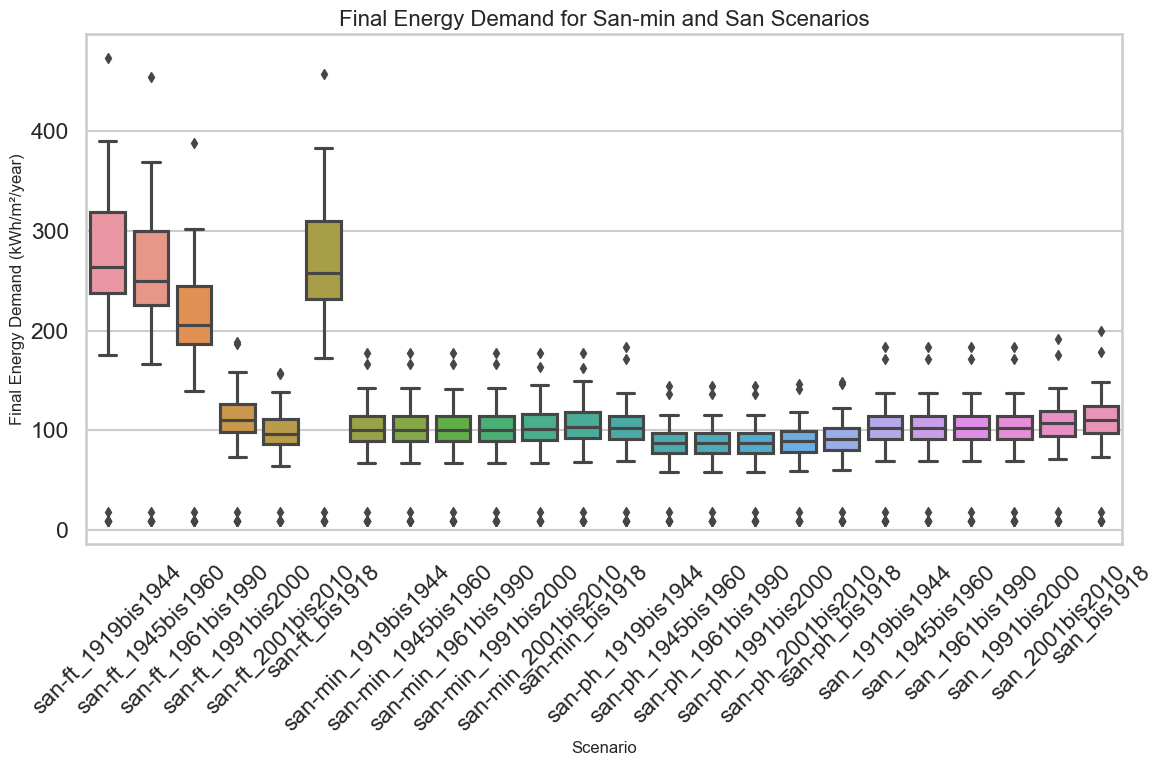

In [ ]:
# Filter the data to include only scenarios that contain 'san-min' or 'san'
filtered_df = df[df['scenario'].str.contains('san-min|san')]

# Set up the figure size for the new plot
plt.figure(figsize=(12, 8))

# Create a boxplot for final energy demand for the filtered scenarios
sns.boxplot(x='scenario', y='total_final_energy_demand_kWhyr_Af_m2', data=filtered_df)

# Set plot title and labels
plt.title('Final Energy Demand for San-min and San Scenarios', fontsize=16)
plt.xlabel('Scenario', fontsize=12)
plt.ylabel('Final Energy Demand (kWh/m²/year)', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Simon Schneider\AppData\Local\Temp\ipykernel_5920\594527816.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_san_df['san_type'] = all_san_df['scenario'].apply(lambda x: x.split('_')[0])


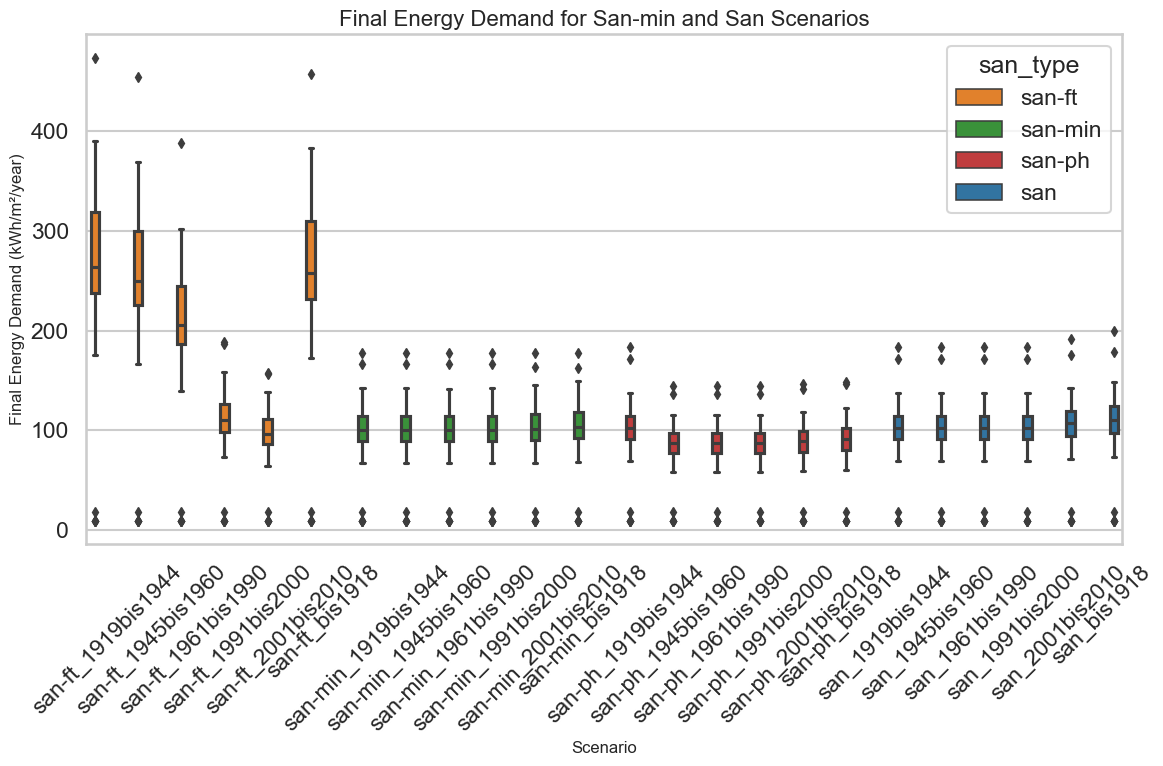

In [ ]:
# Filter the data to include only scenarios that contain 'san'
all_san_df = df[df['scenario'].str.contains('san')]

# Create a new column 'san_type' to group the scenarios by their broad type
all_san_df['san_type'] = all_san_df['scenario'].apply(lambda x: x.split('_')[0])

# Define a color palette for each broad scenario type
palette = {
    'san': '#1f77b4',     # blue
    'san-ft': '#ff7f0e',  # orange
    'san-min': '#2ca02c', # green
    'san-ph': '#d62728'   # red
}

# Set up the figure size for the new plot
plt.figure(figsize=(12, 8))

# Create a boxplot for final energy demand, using the 'san_type' for the color palette
sns.boxplot(x='scenario', y='total_final_energy_demand_kWhyr_Af_m2', data=all_san_df, hue='san_type', palette=palette)

# Set plot title and labels
plt.title('Final Energy Demand for San-min and San Scenarios', fontsize=16)
plt.xlabel('Scenario', fontsize=12)
plt.ylabel('Final Energy Demand (kWh/m²/year)', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




C:\Users\Simon Schneider\AppData\Local\Temp\ipykernel_5920\2223480927.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['scenario'] = pd.Categorical(filtered_df['scenario'], categories=sorted_scenarios, ordered=True)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Simon Schneider\AppData\Local\Temp\ipykernel_5920\2223480927.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future ver

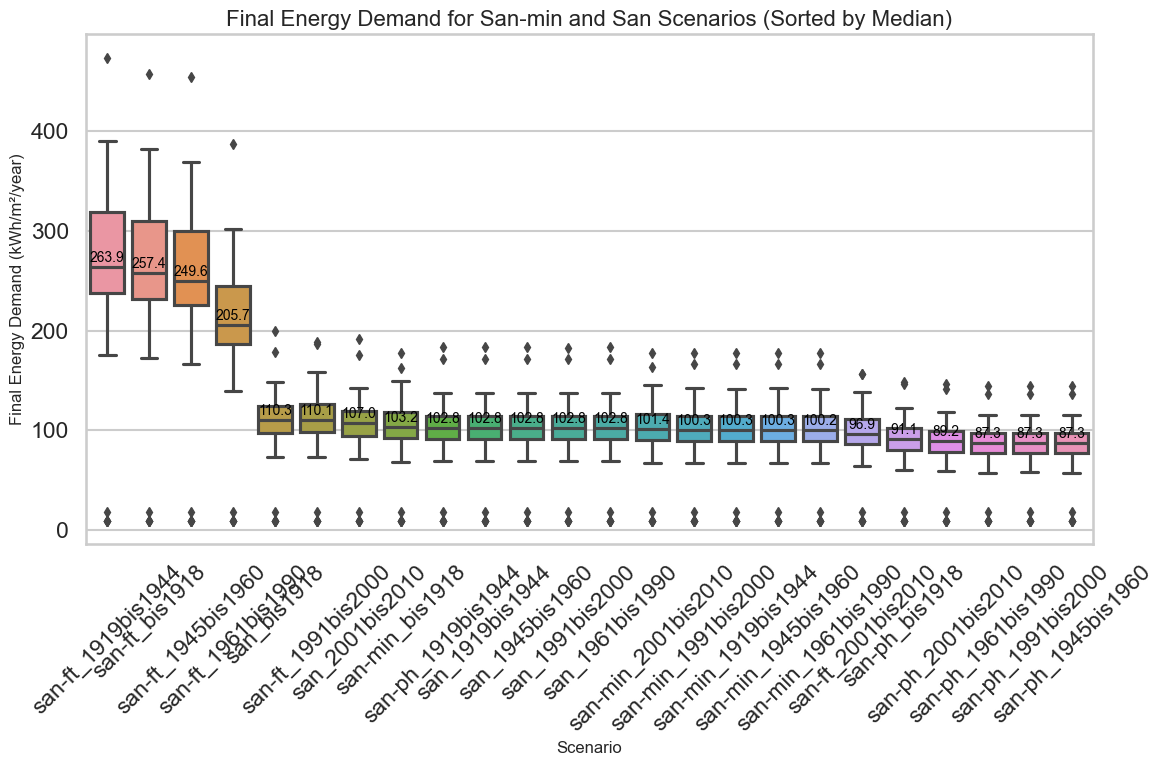

In [ ]:
# First, sort the filtered data by median final energy demand for each scenario
sorted_scenarios = filtered_df.groupby('scenario')['total_final_energy_demand_kWhyr_Af_m2'].median().sort_values(ascending=False).index

# Reorder the filtered DataFrame based on the sorted scenarios
filtered_df['scenario'] = pd.Categorical(filtered_df['scenario'], categories=sorted_scenarios, ordered=True)

# Set up the figure size for the new boxplot
plt.figure(figsize=(12, 8))

# Create the boxplot for the sorted filtered data
sns.boxplot(x='scenario', y='total_final_energy_demand_kWhyr_Af_m2', data=filtered_df)

# Add the median values to the plot
medians = filtered_df.groupby('scenario')['total_final_energy_demand_kWhyr_Af_m2'].median().sort_index()
for i, median in enumerate(medians):
    plt.text(i, median + 5, f'{median:.1f}', ha='center', color='black', fontsize=10)

# Set plot title and labels
plt.title('Final Energy Demand for San-min and San Scenarios (Sorted by Median)', fontsize=16)
plt.xlabel('Scenario', fontsize=12)
plt.ylabel('Final Energy Demand (kWh/m²/year)', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


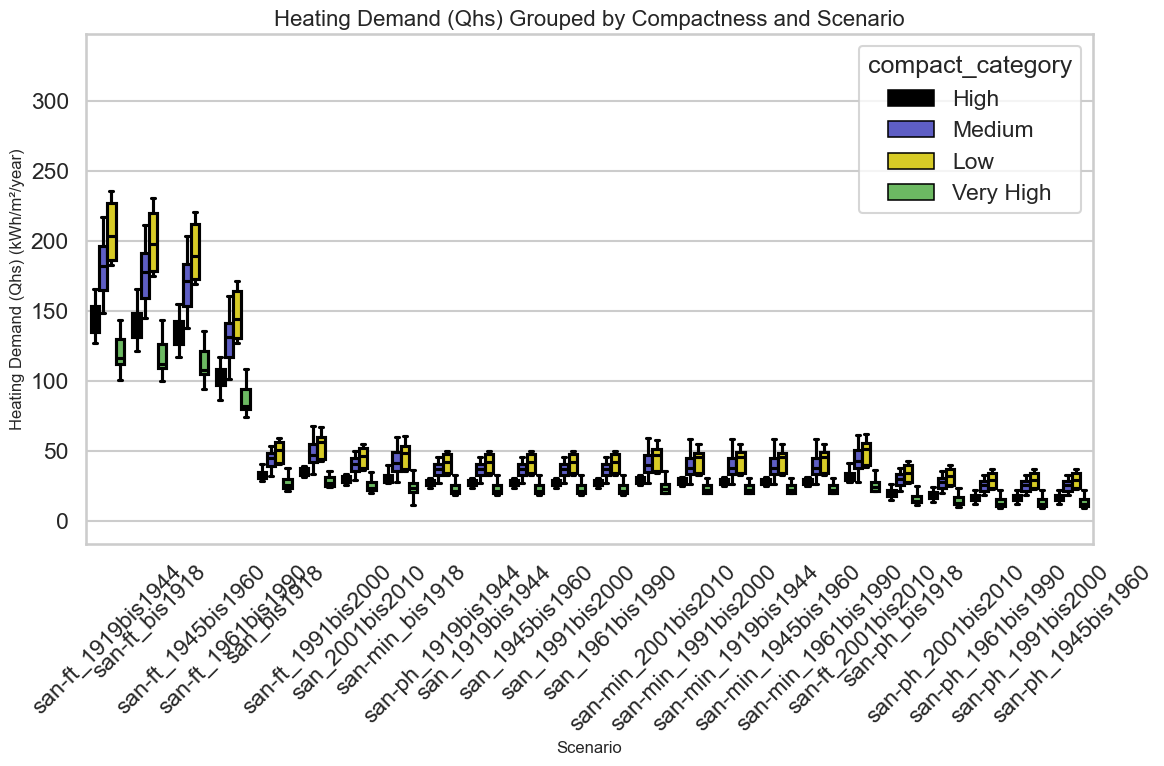

In [ ]:
# Set up the figure size for the boxplot
plt.figure(figsize=(12, 8))

# Create a boxplot for heating demand (Qhs_kWhyr_Af_m2) grouped by Kompaktheit and Scenario
sns.boxplot(x='scenario', y='Qhs_kWhyr_Af_m2', hue='compact_category', data=filtered_df, fliersize=0)

# Set plot title and labels
plt.title('Heating Demand (Qhs) Grouped by Compactness and Scenario', fontsize=16)
plt.xlabel('Scenario', fontsize=12)
plt.ylabel('Heating Demand (Qhs) (kWh/m²/year)', fontsize=12)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


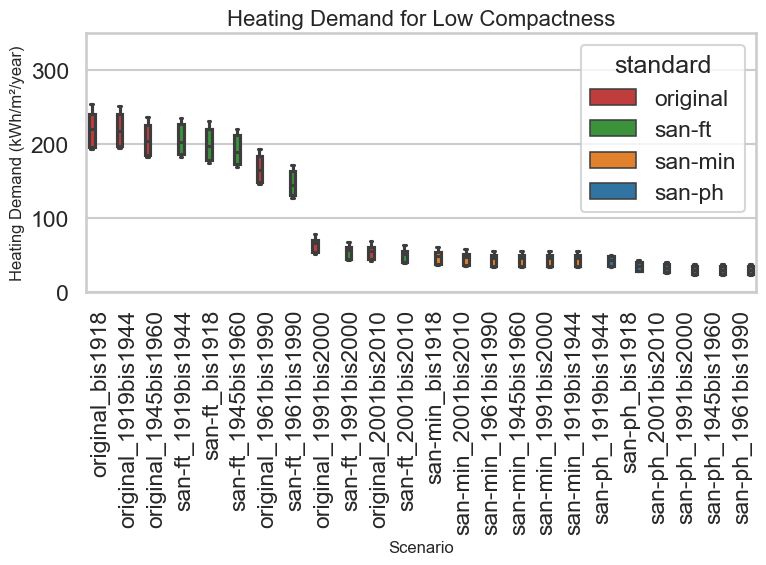

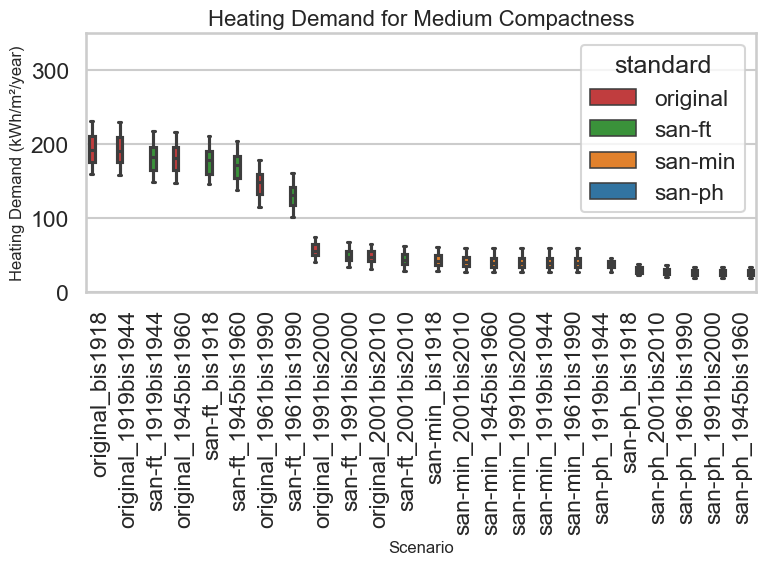

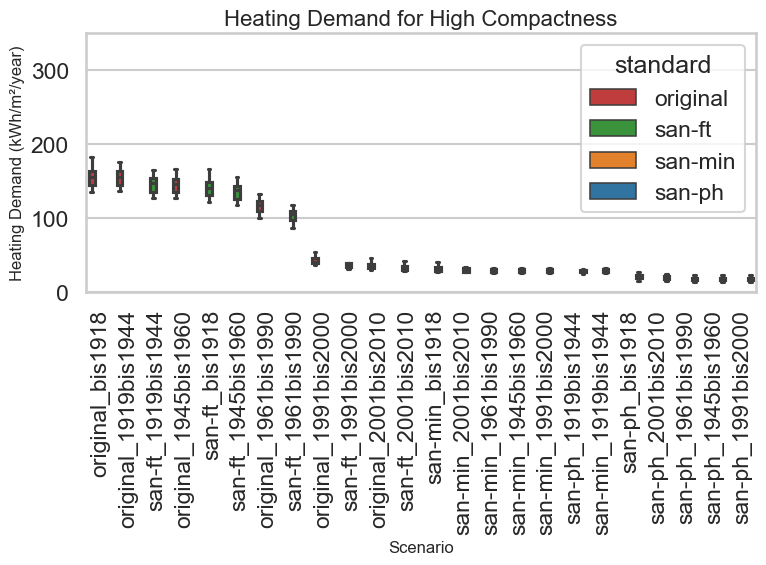

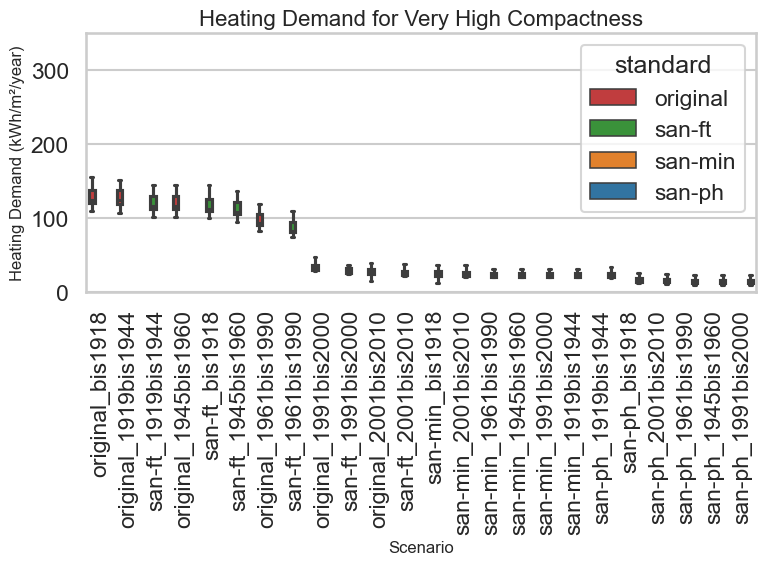

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a new column for 'standard' based on the 'scenario' column
def extract_standard(scenario):
    if 'san-min' in scenario:
        return 'san-min'
    elif 'san-ft' in scenario:
        return 'san-ft'
    elif 'san-ph' in scenario:
        return 'san-ph'
    elif 'san_' in scenario:
        return 'san_'
    else:
        return 'original'

# Apply the function to create the 'standard' column
df['standard'] = df['scenario'].apply(extract_standard)

# Exclude rows where the standard is '_san_'
df_filtered = df[df['standard'] != 'san_']

# Define the order for the 'compact_category'
compact_order = ['Low', 'Medium', 'High', 'Very High']

# Define a color palette for the standards (ensure consistency)
palette = {
    'original': '#d62728',   # red
    'san-min': '#ff7f0e',    # orange
    'san-ft': '#2ca02c',     # green
    'san-ph': '#1f77b4'      # blue
}

# Set up the subplots: One plot per 'compact_category'
for compactness in compact_order:
    # Filter the data for the current compactness
    compact_df = df_filtered[df_filtered['compact_category'] == compactness]
    
    # Group by 'scenario' and calculate the median of 'Qhs_kWhyr_Af_m2' to sort boxplots
    median_order = compact_df.groupby('scenario')['Qhs_kWhyr_Af_m2'].median().sort_values(ascending=False).index
    
    # Set up the figure
    plt.figure(figsize=(8, 6))
    
    # Create the boxplot, sorted by median values, and assign consistent colors using 'hue'
    sns.boxplot(
        x='scenario',
        y='Qhs_kWhyr_Af_m2',
        data=compact_df,
        order=median_order,  # Sort by median
        hue='standard',  # Color by the 'standard' column
        palette=palette,  # Use the predefined palette for standards
        showfliers=False
        )
    
    # Set y-axis limit to 350
    plt.ylim(0, 350)
    
    # Set titles and labels
    plt.title(f'Heating Demand for {compactness} Compactness', fontsize=16)
    plt.xlabel('Scenario', fontsize=12)
    plt.ylabel('Heating Demand (kWh/m²/year)', fontsize=12)
    plt.xticks(rotation=90)  # Rotate scenario names for better readability
    
    # Show the plot
    plt.tight_layout()
    plt.show()




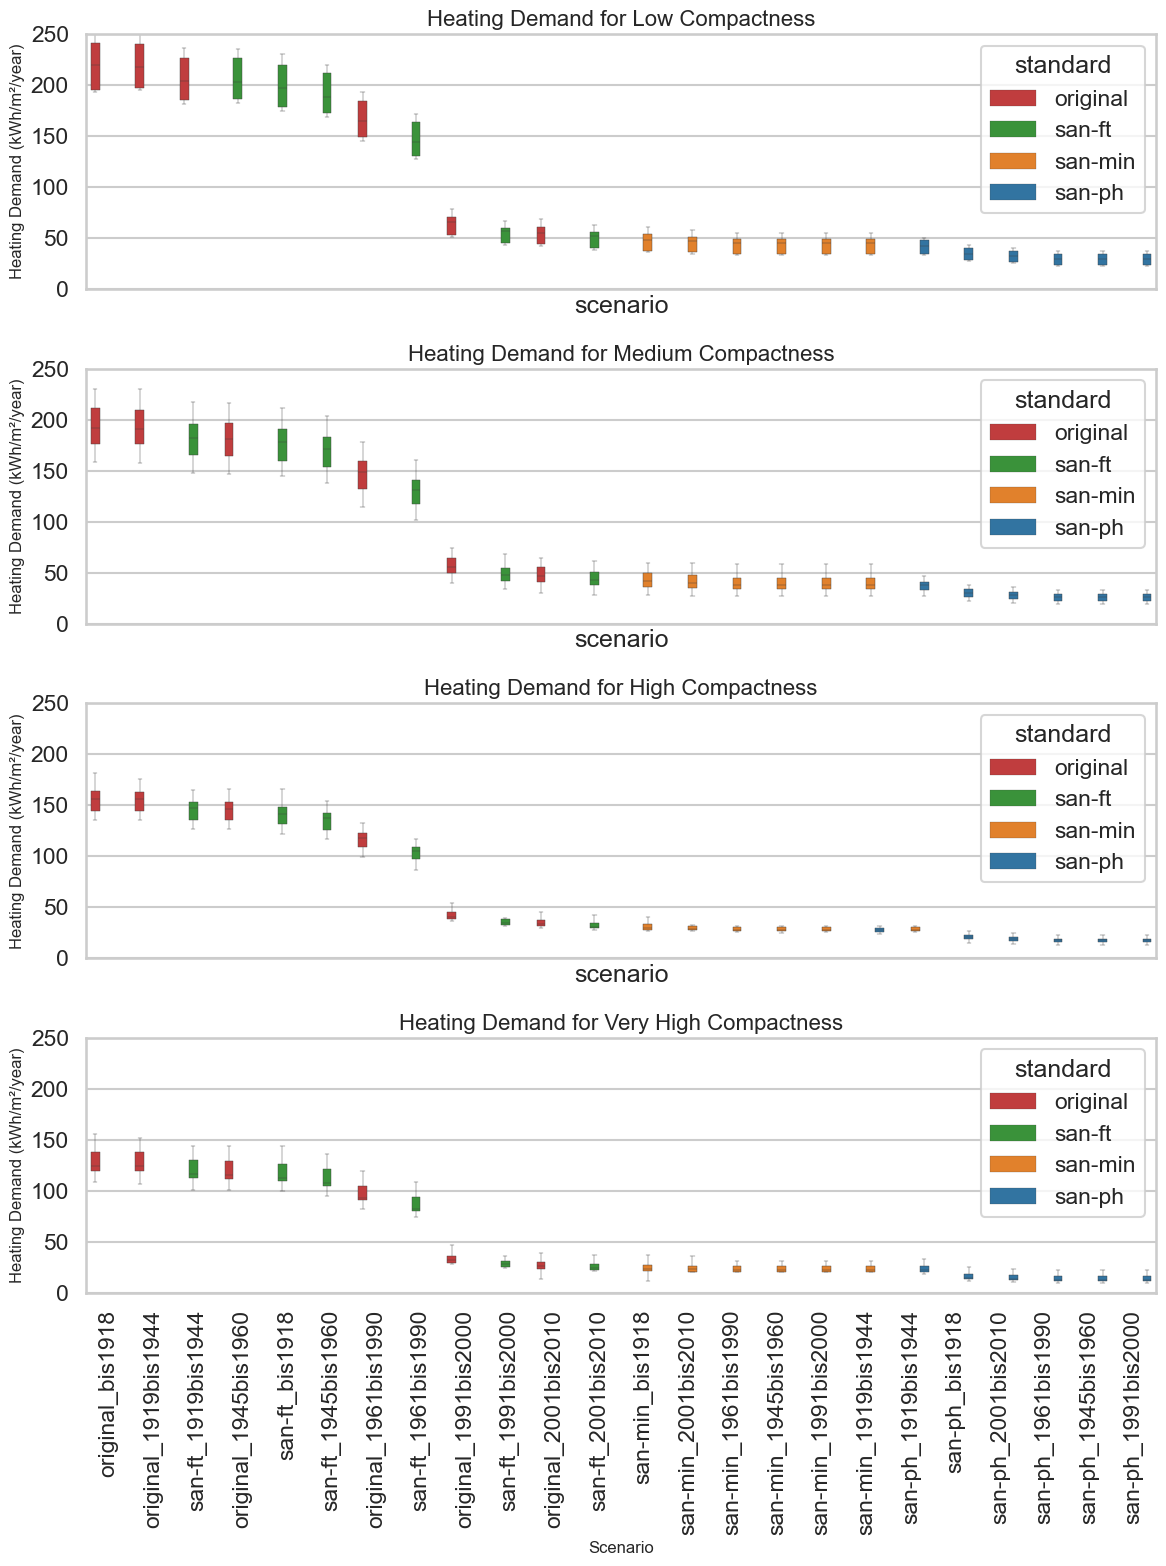

In [ ]:
# Create a figure with 4 subplots (one per compactness category)
fig, axes = plt.subplots(4, 1, figsize=(12, 16), sharex=True)

# Set up the subplots: One plot per 'compact_category'
for i, compactness in enumerate(compact_order):
    # Filter the data for the current compactness
    compact_df = df_filtered[df_filtered['compact_category'] == compactness]
    
    # Group by 'scenario' and calculate the median of 'Qhs_kWhyr_Af_m2' to sort boxplots
    median_order = compact_df.groupby('scenario')['Qhs_kWhyr_Af_m2'].median().sort_values(ascending=False).index
    
    # Create the boxplot, sorted by median values, and assign consistent colors using 'hue'
    sns.boxplot(
        x='scenario',
        y='Qhs_kWhyr_Af_m2',
        data=compact_df,
        order=median_order,  # Sort by median
        hue='standard',  # Color by the 'standard' column
        palette=palette,  # Use the predefined palette for standards
        showfliers=False,
        ax=axes[i],  # Plot on the corresponding subplot
        linewidth=0.3
    )
    
    # Set y-axis limit to 350
    axes[i].set_ylim(0, 250)
    
    # Set titles and labels
    axes[i].set_title(f'Heating Demand for {compactness} Compactness', fontsize=16)
    axes[i].set_ylabel('Heating Demand (kWh/m²/year)', fontsize=12)

# Set shared x-axis labels
axes[-1].set_xlabel('Scenario', fontsize=12)
plt.xticks(rotation=90)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
compact_df

,Name,east_walls,east_windows,north_walls,north_windows,south_walls,south_windows,top_roofs,west_walls,west_windows,...,co2_coal,co2_oil,co2_natural_gas,co2_biomass,co2_district_heating,total_co2_emissions,Sanierung,Baualter,Kompaktheit,standard
9,B1009,161.726781,28.540020,523.717183,92.420679,628.496883,110.911215,546.656135,126.748780,22.367432,...,0,0,39736.802430,0,0.0,39736.802430,original,1919 bis 1944,1 - Sehr Hoch,original
11,B1011,0.000000,NaN,428.810280,75.672402,429.115901,75.726335,320.445616,43.098800,7.605671,...,0,0,29635.325458,0,0.0,29635.325458,original,1919 bis 1944,1 - Sehr Hoch,original
14,B1014,0.000000,NaN,319.361921,56.357986,321.008257,56.648516,343.207487,0.000000,NaN,...,0,0,48986.766191,0,0.0,48986.766191,original,1919 bis 1944,1 - Sehr Hoch,original
16,B1016,608.030376,107.299478,370.623706,65.404183,380.126927,67.081222,435.253578,0.000000,NaN,...,0,0,44851.867107,0,0.0,44851.867107,original,1919 bis 1944,1 - Sehr Hoch,original
17,B1017,0.000000,NaN,778.640733,137.407188,778.040749,137.301309,488.183984,120.003383,21.177068,...,0,0,40028.837931,0,0.0,40028.837931,original,1919 bis 1944,1 - Sehr Hoch,original
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1803,B1055,333.875485,58.919203,0.000000,NaN,0.000000,NaN,191.578118,332.591976,58.692702,...,0,0,10177.337818,0,0.0,10177.337818,san-ph,bis1918,1 - Sehr Hoch,san-ph
1805,B1057,0.000000,NaN,370.867243,65.447160,366.185556,64.620980,344.772569,0.000000,NaN,...,0,0,14211.199672,0,0.0,14211.199672,san-ph,bis1918,1 - Sehr Hoch,san-ph
1811,B1064,0.000000,NaN,699.597978,123.458467,693.602294,122.400405,672.715575,0.000000,NaN,...,0,0,11027.075612,0,0.0,11027.075612,san-ph,bis1918,1 - Sehr Hoch,san-ph
1816,B1069,52.739360,9.306946,16.255909,2.868690,50.409793,8.895846,272.049545,44.141522,7.789680,...,0,0,19777.319887,0,0.0,19777.319887,san-ph,bis1918,1 - Sehr Hoch,san-ph


In [ ]:
#wirtschaftliche Kennzahlen

# Volllaststunden 

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

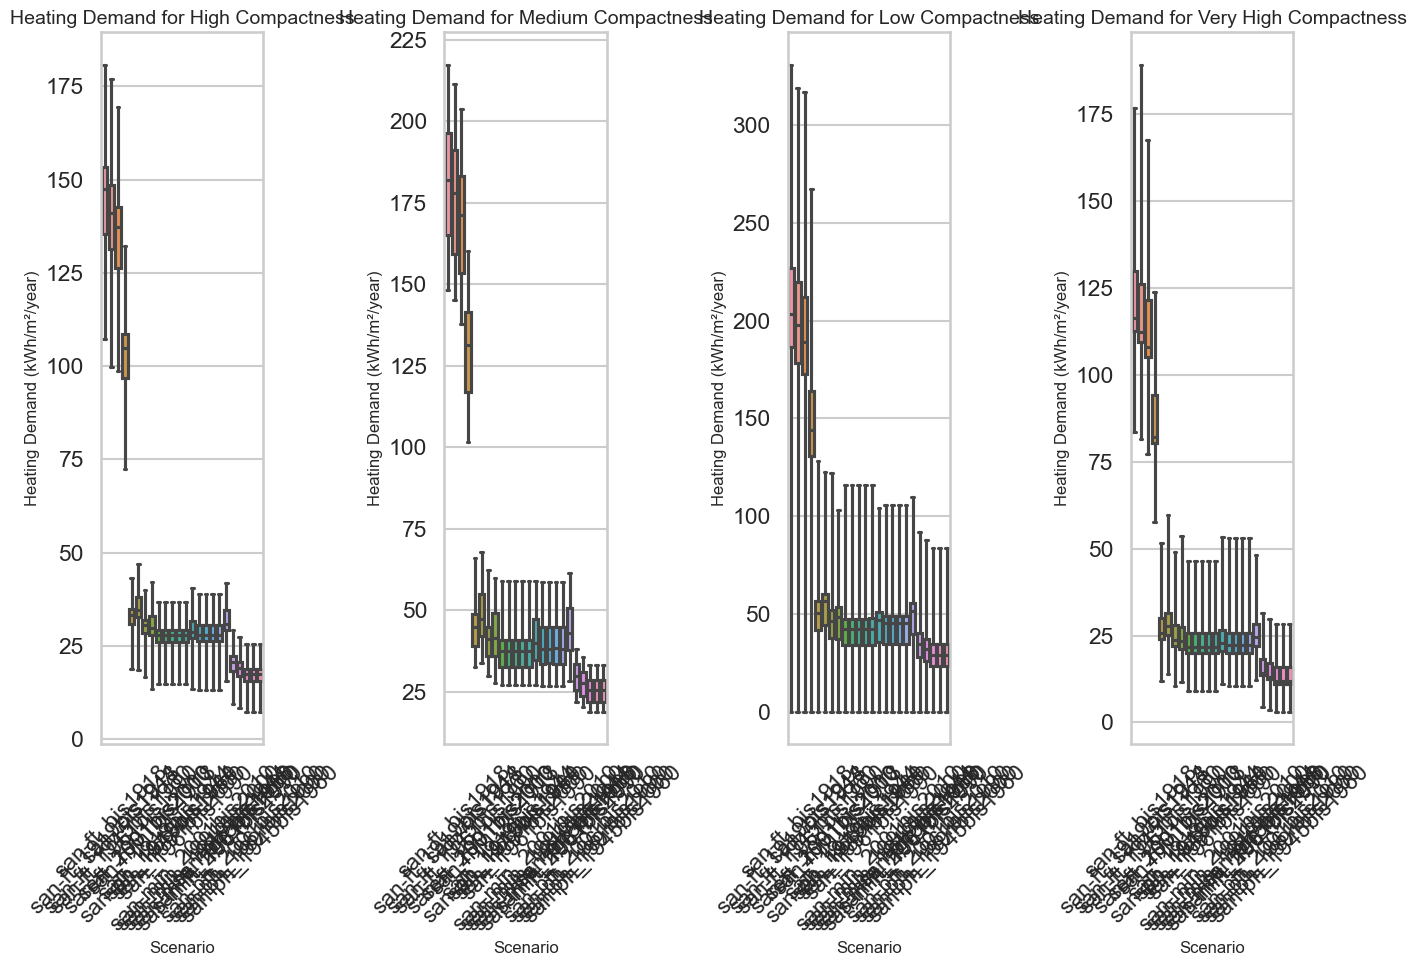

In [ ]:
# Set up the figure size for the subplots
plt.figure(figsize=(14, 10))

# Get the unique compact categories, excluding NaN values
compact_categories = filtered_df['compact_category'].dropna().unique()

# Dynamically set up the number of subplots based on the number of compact categories
num_plots = len(compact_categories)

# Loop through each compact category and create a subplot for each
for i, compact in enumerate(compact_categories, 1):
    plt.subplot(1, num_plots, i)  # Adjusting the subplot arrangement dynamically
    
    # Filter the data for the current compact category
    compact_df = filtered_df[filtered_df['compact_category'] == compact]
    
    # Create the boxplot for heating demand grouped by scenario, without whiskers and outliers
    sns.boxplot(x='scenario', y='Qhs_kWhyr_Af_m2', data=compact_df, whis=[0, 100], showfliers=False)
    
    # Set titles and labels
    plt.title(f'Heating Demand for {compact} Compactness', fontsize=14)
    plt.xlabel('Scenario', fontsize=12)
    plt.ylabel('Heating Demand (kWh/m²/year)', fontsize=12)
    plt.xticks(rotation=45)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
